In [1]:
import numpy as np 
import pandas as pd 
import os 
import glob 
from datetime import datetime
import matplotlib.pyplot as plt 
import xlrd
import plotly.graph_objects as go
import plotly.express as px

In [11]:
data1 = pd.read_csv("Garmin_running.csv",na_values="--")

In [12]:
# Remove data 
data1.drop(columns=['Favorite','Flow','Grit','Min Temp','Surface Interval','Decompression','Max Temp','Bottom Time'],inplace=True)

# Format data
data1['Date'] = pd.to_datetime(data1['Date'], format="%d/%m/%Y %H:%M")

# set of variables to adjust time for 
time_vars = ['Time','Best Lap Time','Avg Pace','Best Pace','Climb Time']

data1[time_vars]=data1[time_vars].astype('str')

# remove miliseconds
def foo3(arg):
    if "." in arg:
        return(arg[:-2])
    else:
        return(arg)
data1[time_vars] = data1[time_vars].applymap(lambda x: foo3(x))

# remove end zeros on climb time
def foo4(arg):
    if len(arg)==8:
        return(arg[:-3])
    else:
        return(arg)
data1['Climb Time'] = data1['Climb Time'].map(lambda x: foo4(x))

# express all as hh:mm:ss
def foo2(arg):
    if len(arg) == 5:
        return('00:'+ arg)
    else:
        return(arg)
    
data1[time_vars] = data1[time_vars].applymap(lambda x: foo2(x))

for i in time_vars:
    data1[i] = pd.to_datetime(data1[i])
    
# Filter only running 
data1 = data1[data1['Activity Type']=="Running"]


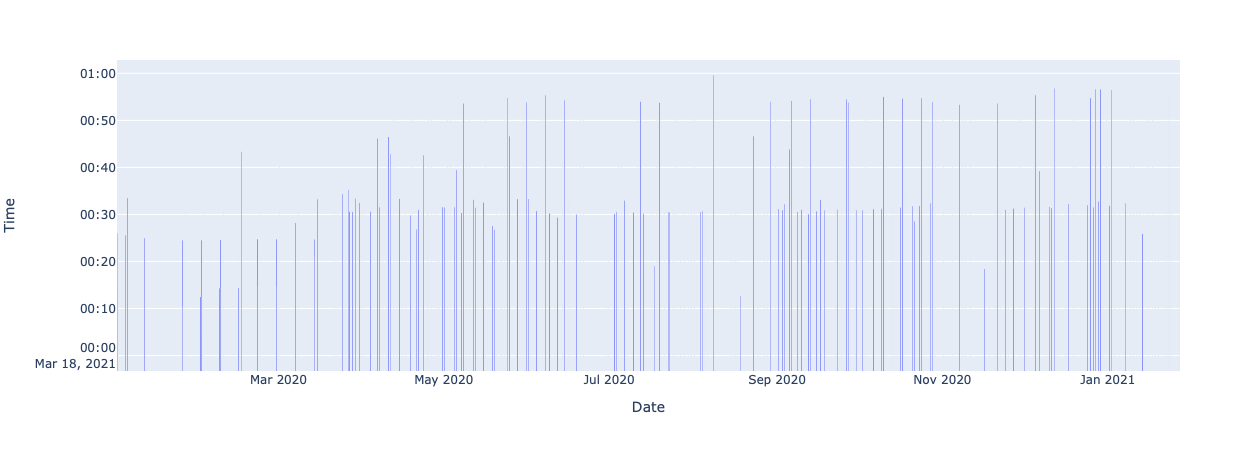

In [13]:

fig = px.bar(data1[data1['Date']>'2020-01-01'], x='Date',y='Time')
fig.show()

Activity Type                       object
Date                        datetime64[ns]
Title                               object
Distance                           float64
Calories                           float64
Time                                object
Avg HR                               int64
Max HR                               int64
Aerobic TE                         float64
Avg Run Cadence                    float64
Max Run Cadence                    float64
Avg Pace                            object
Best Pace                           object
Elev Gain                          float64
Elev Loss                          float64
Avg Stride Length                  float64
Avg Vertical Ratio                 float64
Avg Vertical Oscillation           float64
Avg Ground Contact Time            float64
Avg GCT Balance                     object
Training Stress Score®               int64
Climb Time                          object
Best Lap Time                       object
Number of L